In [83]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import  OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder,LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2


import pickle


In [84]:
data = pd.read_csv('heart.csv')

In [85]:
#EDA
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,934.000000,936.000000,934.000000,933.000000,935.000000,934.000000,937.000000
mean,53.442184,132.360043,198.843683,0.244373,136.860963,0.893469,0.556030
std,9.461966,18.457515,109.288987,0.429945,25.442969,1.065220,0.497116
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.500000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [86]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,43.0,F,TA,100.0,223.0,0.0,Normal,142.0,N,0.0,Up,0
1,44.0,M,ATA,120.0,184.0,0.0,Normal,142.0,N,1.0,Flat,0
2,32.0,M,TA,95.0,0.0,1.0,Normal,127.0,N,0.7,Up,1
3,56.0,M,NAP,130.0,167.0,0.0,Normal,114.0,N,0.0,Up,0
4,43.0,M,ASY,120.0,175.0,0.0,Normal,120.0,Y,1.0,Flat,1


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             934 non-null    float64
 1   Sex             935 non-null    object 
 2   ChestPainType   935 non-null    object 
 3   RestingBP       936 non-null    float64
 4   Cholesterol     934 non-null    float64
 5   FastingBS       933 non-null    float64
 6   RestingECG      934 non-null    object 
 7   MaxHR           935 non-null    float64
 8   ExerciseAngina  935 non-null    object 
 9   Oldpeak         934 non-null    float64
 10  ST_Slope        936 non-null    object 
 11  HeartDisease    937 non-null    int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 88.0+ KB


In [88]:
data.isna().sum()


Age               3
Sex               2
ChestPainType     2
RestingBP         1
Cholesterol       3
FastingBS         4
RestingECG        3
MaxHR             2
ExerciseAngina    2
Oldpeak           3
ST_Slope          1
HeartDisease      0
dtype: int64

<AxesSubplot: >

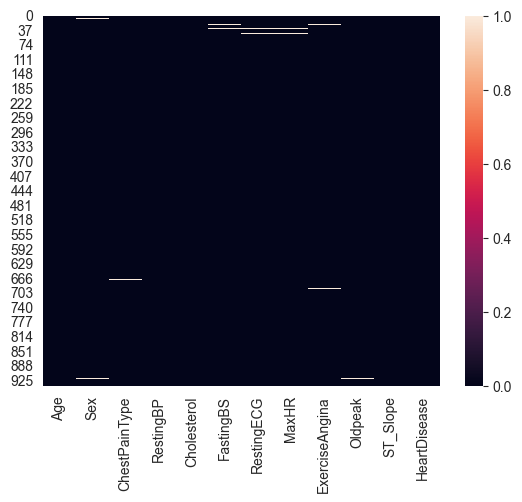

In [89]:
#voir les valeur manquantes
sns.heatmap(data.isna())

In [90]:
data.isna().sum()

Age               3
Sex               2
ChestPainType     2
RestingBP         1
Cholesterol       3
FastingBS         4
RestingECG        3
MaxHR             2
ExerciseAngina    2
Oldpeak           3
ST_Slope          1
HeartDisease      0
dtype: int64

In [91]:
for col in data.select_dtypes('object'):
    print(f'{col :-<15} {data[col].unique()}')

Sex------------ ['F' 'M' nan]
ChestPainType-- ['TA' 'ATA' 'NAP' 'ASY' nan]
RestingECG----- ['Normal' 'LVH' 'ST' nan]
ExerciseAngina- ['N' 'Y' nan]
ST_Slope------- ['Up' 'Flat' 'Down' nan]


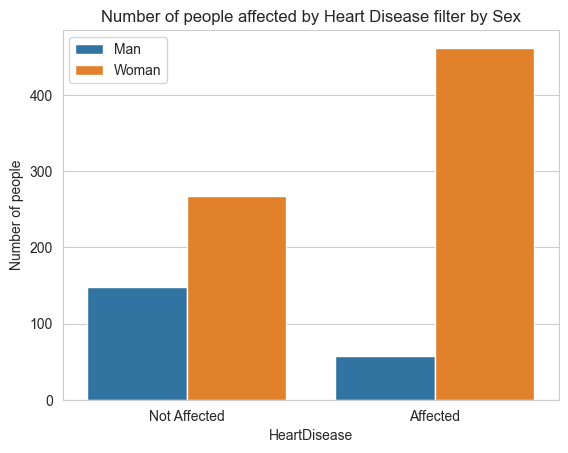

In [92]:
#comparaison par sexe
sns.countplot(data=data, x="HeartDisease", hue="Sex")
plt.title("Number of people affected by Heart Disease filter by Sex")
plt.xticks([0,1],labels=["Not Affected", "Affected"])
plt.ylabel("Number of people")
plt.legend(["Man", "Woman"])
plt.show()

<AxesSubplot: >

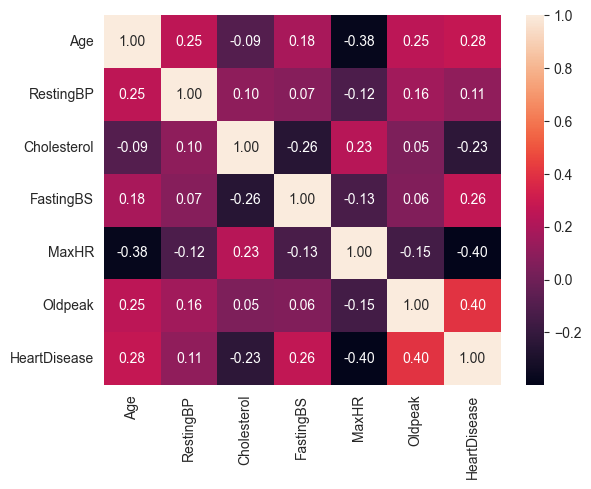

In [93]:
#matrice de correlation
sns.heatmap(data.corr(), annot=True, fmt=".2f")

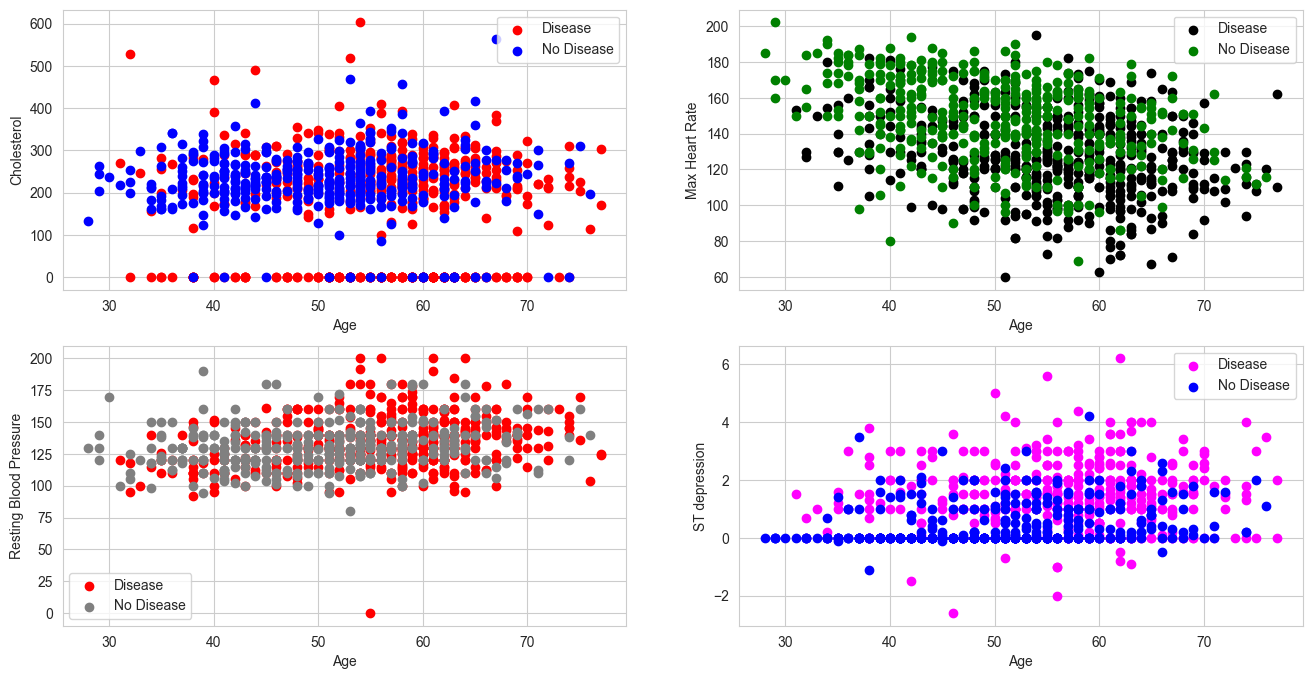

In [94]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(x=data.Age[data.HeartDisease==1], y=data.Cholesterol[(data.HeartDisease==1)], c="red")
plt.scatter(x=data.Age[data.HeartDisease==0], y=data.Cholesterol[(data.HeartDisease==0)], c="blue")
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,2)
plt.scatter(x=data.Age[data.HeartDisease==1], y=data.MaxHR[(data.HeartDisease==1)], c="black")
plt.scatter(x=data.Age[data.HeartDisease==0], y=data.MaxHR[(data.HeartDisease==0)], c="green")
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,3)
plt.scatter(x=data.Age[data.HeartDisease==1], y=data.RestingBP[(data.HeartDisease==1)], c="red")
plt.scatter(x=data.Age[data.HeartDisease==0], y=data.RestingBP[(data.HeartDisease==0)], c="grey")
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,4)
plt.scatter(x=data.Age[data.HeartDisease==1], y=data.Oldpeak[(data.HeartDisease==1)], c="fuchsia")
plt.scatter(x=data.Age[data.HeartDisease==0], y=data.Oldpeak[(data.HeartDisease==0)], c="blue")
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.legend(['Disease','No Disease'])
plt.show()


Text(0.5, 1.0, 'Resting Blood Pressure Interval')

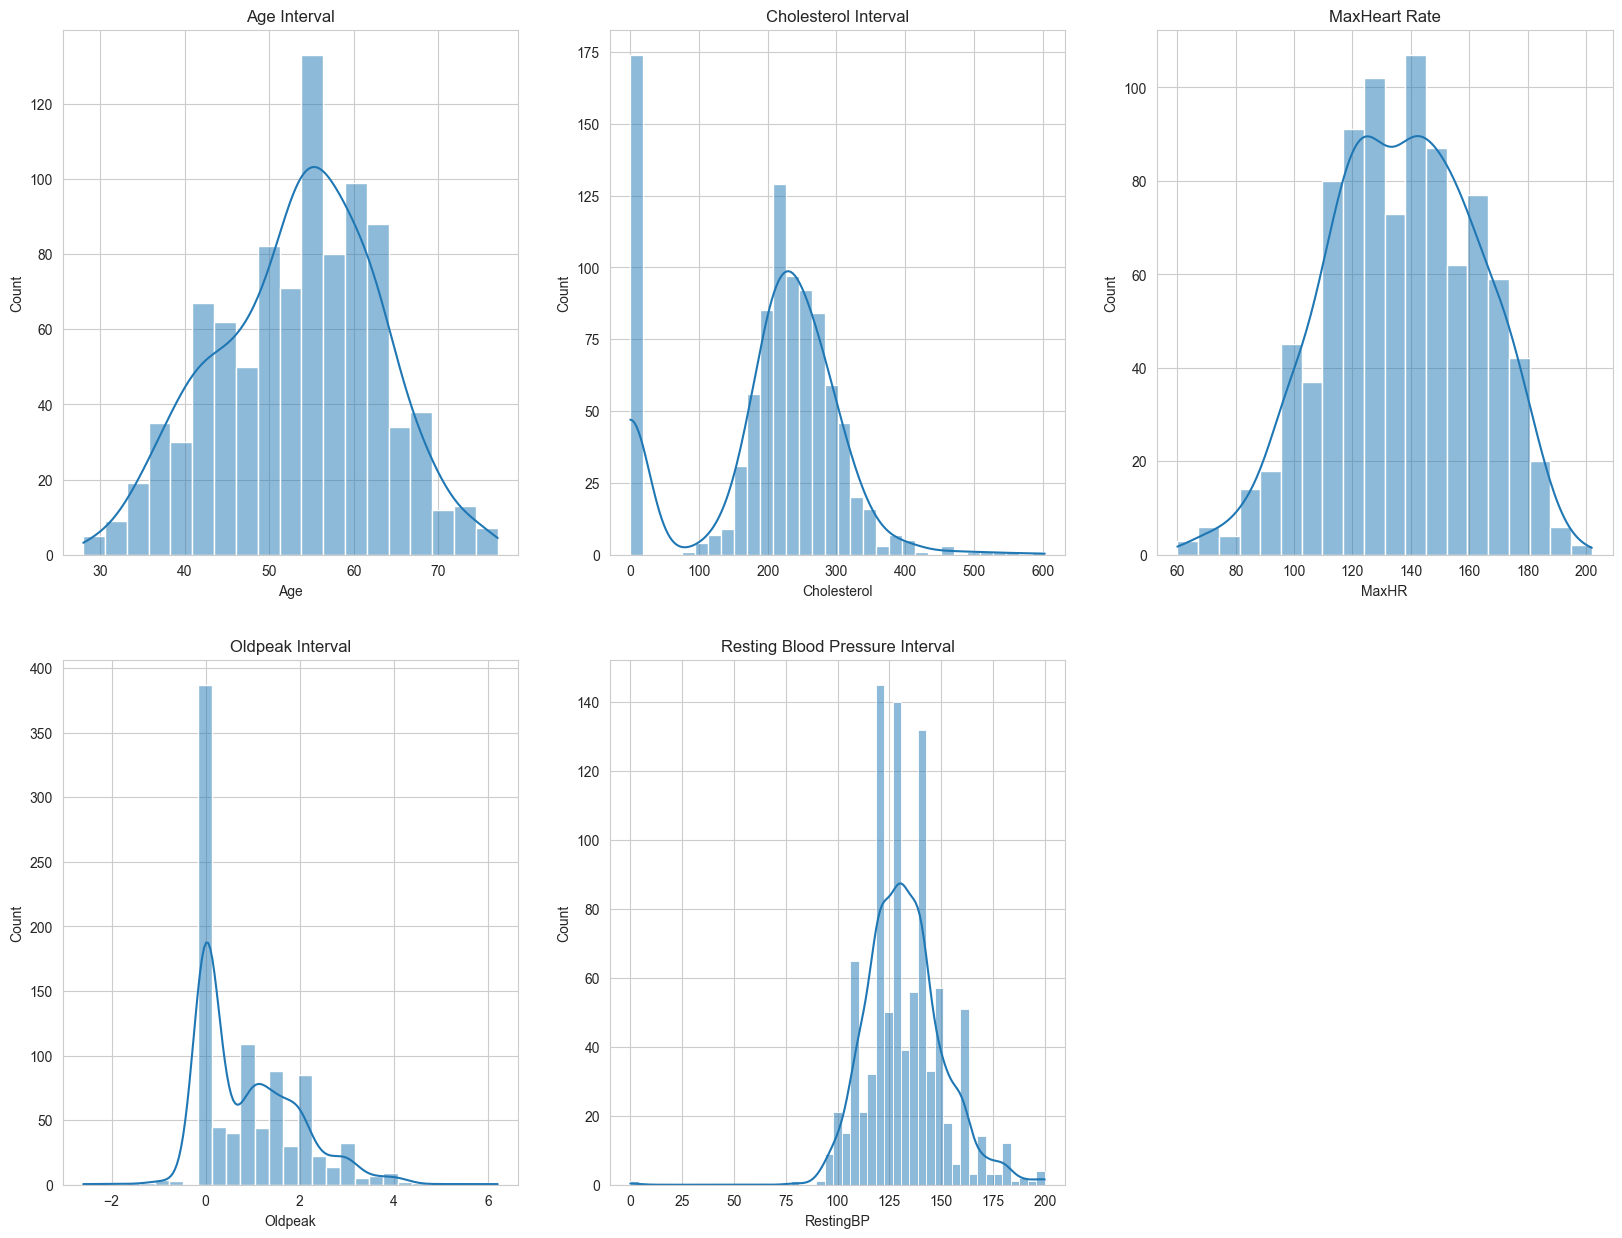

In [95]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.histplot(data['Age'], kde=True).set_title('Age Interval')

plt.subplot(2,3,2)
sns.histplot(data['Cholesterol'], kde=True).set_title('Cholesterol Interval')

plt.subplot(2,3,3)
sns.histplot(data['MaxHR'], kde=True).set_title('MaxHeart Rate')

plt.subplot(2,3,4)
sns.histplot(data['Oldpeak'], kde=True).set_title('Oldpeak Interval')

plt.subplot(2,3,5)
sns.histplot(data['RestingBP'], kde=True).set_title('Resting Blood Pressure Interval')

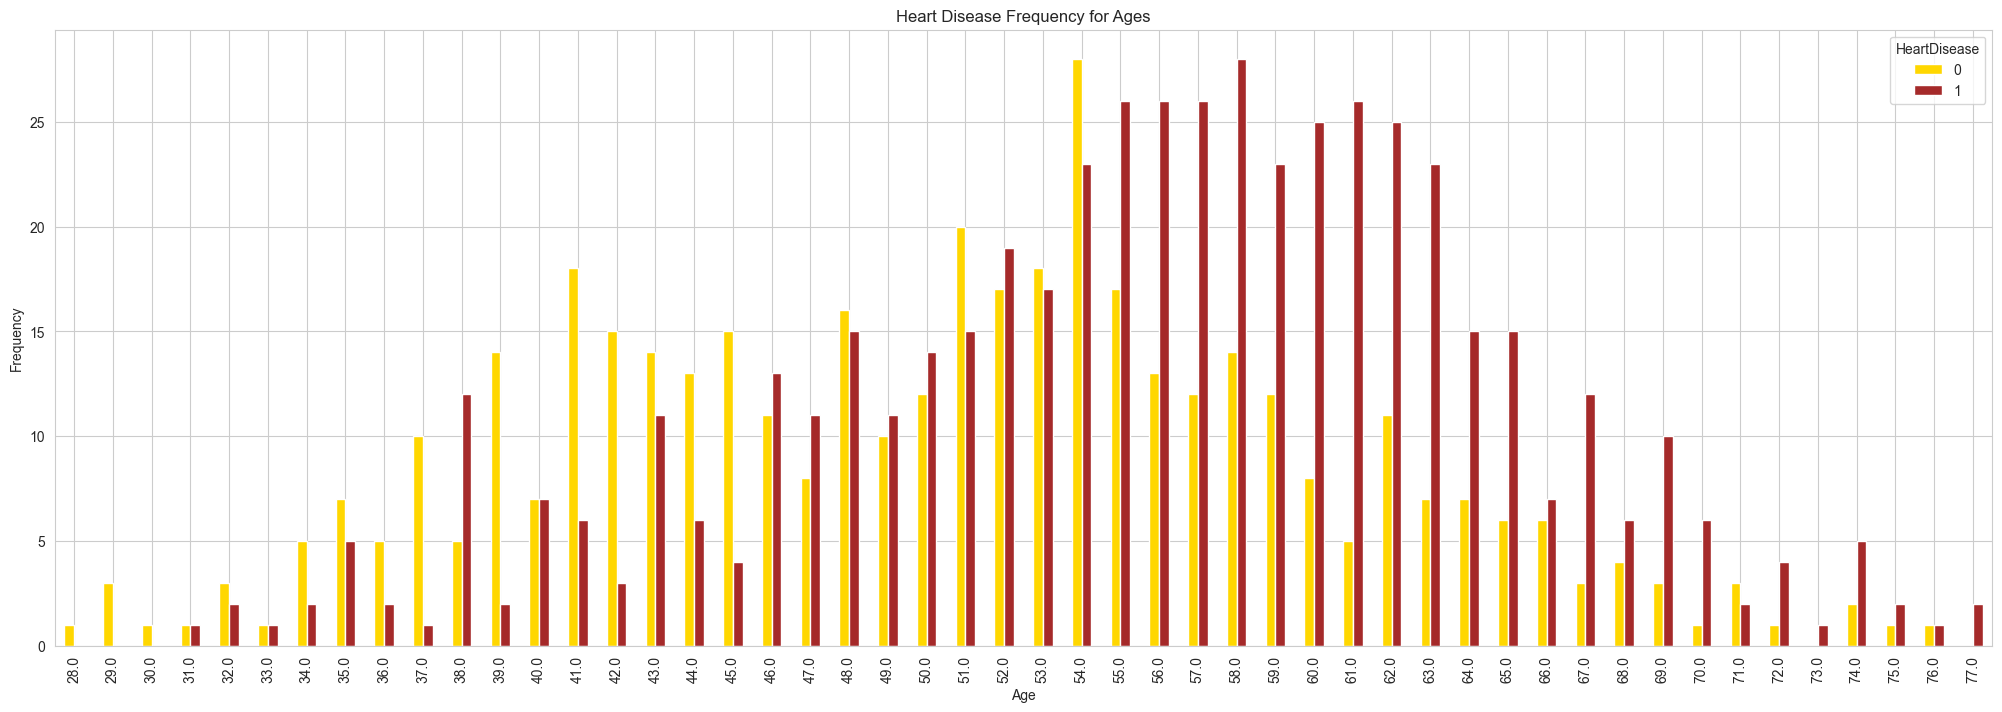

In [96]:
pd.crosstab(data.Age,data.HeartDisease).plot(kind="bar",figsize=(25,8),color=['gold','brown' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [97]:
#preprocessing
from sklearn.model_selection import train_test_split

In [98]:
#suppression des valeur manquante et split data 
X1 = data.dropna( axis=0)
X = X1.iloc[:, :-1]
y = X1.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
895,57.0,M,ASY,110.0,335.0,0.0,Normal,143.0,Y,3.0,Flat
469,56.0,M,ATA,124.0,224.0,1.0,Normal,161.0,N,2.0,Flat
812,54.0,F,NAP,110.0,214.0,0.0,Normal,158.0,N,1.6,Flat
28,53.0,F,ATA,113.0,468.0,0.0,Normal,127.0,N,0.0,Up
89,55.0,M,ASY,140.0,229.0,0.0,Normal,110.0,Y,0.5,Flat
...,...,...,...,...,...,...,...,...,...,...,...
111,57.0,M,ASY,150.0,255.0,0.0,Normal,92.0,Y,3.0,Flat
279,54.0,F,ATA,130.0,253.0,0.0,ST,155.0,N,0.0,Up
875,58.0,F,NAP,120.0,340.0,0.0,Normal,172.0,N,0.0,Up
447,77.0,M,ASY,124.0,171.0,0.0,ST,110.0,Y,2.0,Up


In [99]:
X_test.value_counts().sum()

184

In [100]:
y_train.value_counts()


1    409
0    327
Name: HeartDisease, dtype: int64

In [129]:

np.random.seed(42)
numerical_features = ["Age", "Oldpeak", "MaxHR", "RestingBP", "Cholesterol"]
categorical_features = ["Sex", "ChestPainType", "FastingBS", "ExerciseAngina"]
ordinal_features = ["RestingECG", "ST_Slope"]

preprocessor = make_column_transformer(
    (MinMaxScaler(),numerical_features),(OneHotEncoder(),categorical_features),(OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1  ),ordinal_features ) 
)

X_trainp=preprocessor.fit_transform(X_train)
X_testp=preprocessor.fit_transform(X_test)



Age------------ (0, 191.88154446600106)
Sex------------ (1, 16.021986319246793)
ChestPainType-- (2, 121.81961252817842)
RestingBP------ (3, 42.80613143919125)
Cholesterol---- (4, 601.6105766056601)
FastingBS------ (5, 34.763173625367415)
RestingECG----- (6, 0.6000956893509166)
MaxHR---------- (7, 1404.6326431941193)
ExerciseAngina- (8, 105.4995955482336)
Oldpeak-------- (9, 751.3026286012573)
ST_Slope------- (10, 65.54768797943397)


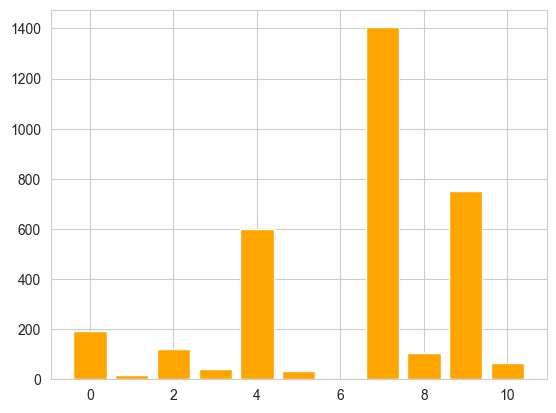

In [130]:
#voir l'importance des variable
from matplotlib import pyplot
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=8)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train, X_test_enc)
# what are scores for the features
l=list(data.columns)
for i in range(len(fs.scores_)):
    print(   f'{l[i] :-<15}' ,(i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_,color='orange')
pyplot.show()


C:\Users\fuji\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\fuji\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

0.8573451002022431
{'C': 10}
               precision    recall  f1-score   support

           0       0.76      0.84      0.79        85
           1       0.84      0.77      0.80        99

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184



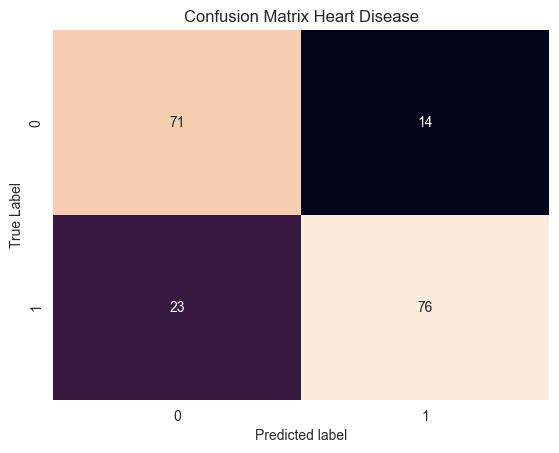

In [131]:
#logisticregression
np.random.seed(42)
accuracies={}

parameters =[ {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
   

grid1 = GridSearchCV(LogisticRegression(),
                    parameters,
                    cv=5)

grid1.fit(X_trainp, y_train)
y_pred1 = grid1.predict(X_testp)
acc1=accuracy_score(y_test,y_pred1)
accuracies['LogisticRegression']=acc1*100
print(grid1.best_score_)
print(grid1.best_params_)
print("",classification_report(y_test,y_pred1))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heart Disease")
plt.show()

0.8600569957712816
{'metric': 'manhattan', 'n_neighbors': 38}
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        85
           1       0.85      0.87      0.86        99

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



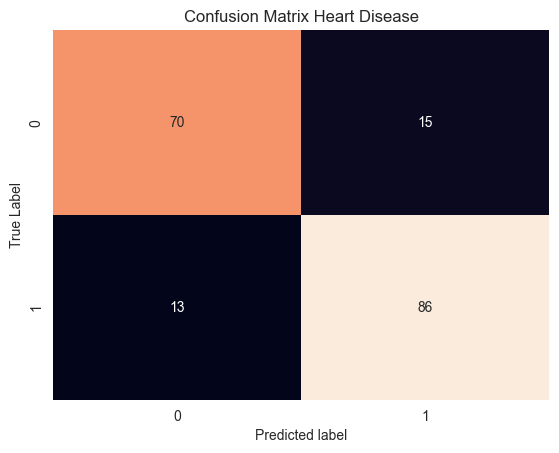

In [132]:
#Knn
np.random.seed(42)
param_grid = {'n_neighbors': np.arange(1, 40),
              'metric': ['euclidean', 'manhattan']}
grid2= GridSearchCV(KNeighborsClassifier(n_neighbors=38),
                    param_grid,
                    cv=5
                   )

grid2.fit(X_trainp, y_train)
y_pred2 = grid2.predict(X_testp)
acc2=accuracy_score(y_test,y_pred2)
accuracies['KNeighborsClassifier']=acc2*100

print(grid2.best_score_)
print(grid2.best_params_) 

print("",classification_report(y_test,y_pred2))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heart Disease")
plt.show()

0.8437580437580436
{'criterion': 'gini', 'max_depth': 4}
               precision    recall  f1-score   support

           0       0.67      0.81      0.73        85
           1       0.80      0.66      0.72        99

    accuracy                           0.73       184
   macro avg       0.74      0.73      0.73       184
weighted avg       0.74      0.73      0.73       184



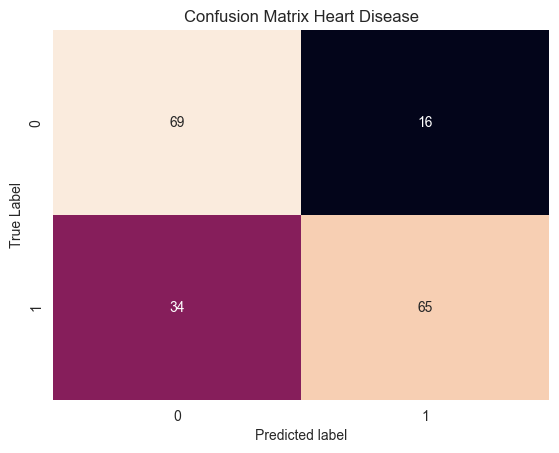

In [133]:

np.random.seed(42)

#DecisionTreeClassifier
params ={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
grid3= GridSearchCV(DecisionTreeClassifier(random_state=42),
                    params,
                    cv=5
                   )

grid3.fit(X_trainp, y_train)
y_pred3 = grid3.predict(X_testp)
acc3=accuracy_score(y_test,y_pred3)
accuracies['DecisionTreeClassifier']=acc3*100
print(grid3.best_score_)
print(grid3.best_params_)
print("",classification_report(y_test,y_pred3))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heart Disease")
plt.show()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
0.8464699393270821
{'var_smoothing': 1.0}
               precision    recall  f1-score   support

           0       0.83      0.82      0.83        85
           1       0.85      0.86      0.85        99

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



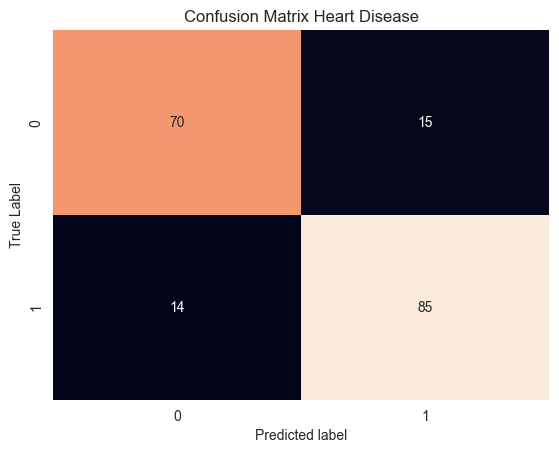

In [134]:
#NaiveBayes
np.random.seed(42)
params = {'var_smoothing': np.logspace(0,-9, num=100)}
grid4= GridSearchCV(GaussianNB(),
                    params,
                    cv=5,
                    verbose=1,
                    scoring='accuracy'
                   )

grid4.fit(X_trainp, y_train)
y_pred4 = grid4.predict(X_testp)
acc4=accuracy_score(y_test,y_pred4)
accuracies['naivebayes']=acc4*100
print(grid4.best_score_)
print(grid4.best_params_)
print("",classification_report(y_test,y_pred4))
sns.heatmap(confusion_matrix(y_test, y_pred4), annot=True, cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heart Disease")
plt.show()

Fitting 5 folds for each of 15 candidates, totalling 75 fits
0.8464699393270821
{'var_smoothing': 1.0}
               precision    recall  f1-score   support

           0       0.83      0.82      0.83        85
           1       0.85      0.86      0.85        99

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



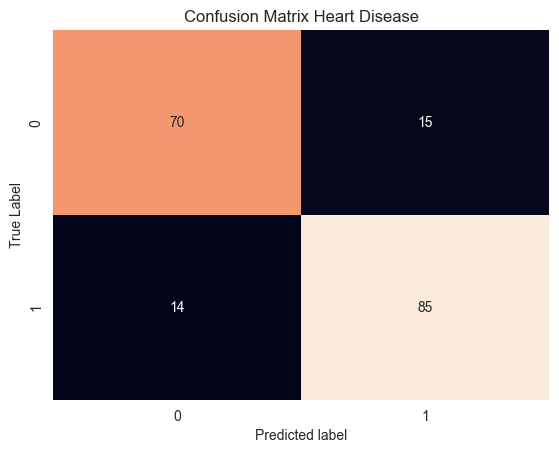

In [135]:
#randomforest
np.random.seed(42)
params = {'n_estimators': [320,330,340],'max_depth': [8, 9, 10, 11, 12]}
grid5= GridSearchCV(RandomForestClassifier(),
                    params,
                    cv=5,
                    verbose=1,
                    scoring='accuracy'
                   )

grid5.fit(X_trainp, y_train)
y_pred5 = grid5.predict(X_testp)
acc5=accuracy_score(y_test,y_pred5)
accuracies['RandomForest']=acc5*100
print(grid4.best_score_)
print(grid4.best_params_)
print("",classification_report(y_test,y_pred5))
sns.heatmap(confusion_matrix(y_test, y_pred5), annot=True, cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heart Disease")
plt.show()


In [136]:
accuracies


{'LogisticRegression': 79.8913043478261,
 'KNeighborsClassifier': 84.78260869565217,
 'DecisionTreeClassifier': 72.82608695652173,
 'naivebayes': 84.23913043478261,
 'RandomForest': 84.23913043478261}

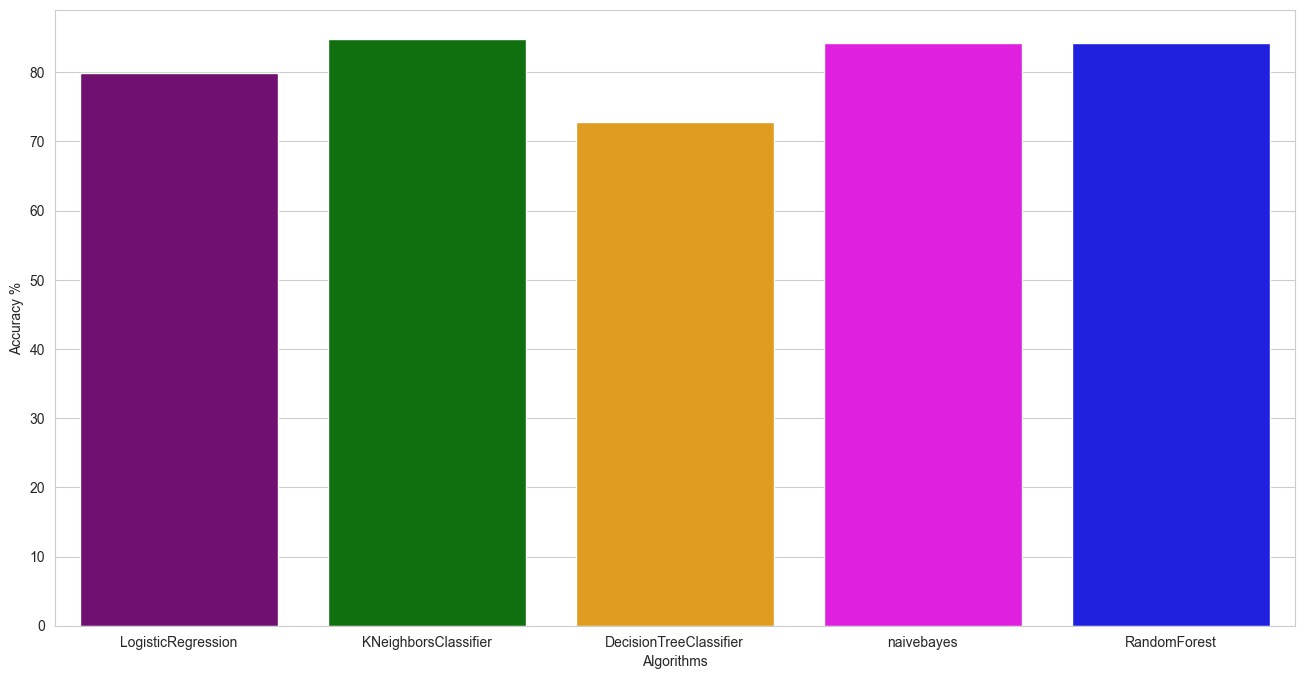

In [137]:
colors = ["purple", "green", "orange", "magenta","blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

In [147]:
data2=pd.DataFrame({
    "Age": [70],
    "Sex": ["F"],
    "ChestPainType": ["ASY"],
    "RestingBP": [192],
    "Cholesterol": [140],
    "FastingBS": [0],
    "RestingECG": ["Normal"],
    "MaxHR": [160],
    "ExerciseAngina": ["Y"],
    "Oldpeak": [1.9],
    "ST_Slope": ["Up"]
}) 
finalmodel=make_pipeline(preprocessor,KNeighborsClassifier(n_neighbors=38))
finalmodel.fit(X_train, y_train)
yhat = finalmodel.predict(X_test)
print(yhat)


[0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1
 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0
 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1
 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0]


In [139]:
pickle_file = open('model.pkl', 'ab')
pickle.dump(finalmodel, pickle_file)                     
pickle_file.close()

In [148]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict(data2)) 
print(model.predict(data2)) 


[1]
